# Exploratory Data Analysis & Business Analytics


Author Name: Ramdas Balasaheb Yamgar

In [1]:
# Importing the Libraries

import numpy as np 
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Dataset

data = pd.read_csv("hotel_bookings 2.csv")

In [3]:
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
86793,City Hotel,0,85,2016,April,15,7,0,2,2,...,No Deposit,9.0,NaN,0,Transient,95.5,1,1,Check-Out,9/4/2016
78579,City Hotel,0,4,2015,October,42,12,1,0,1,...,No Deposit,NaN,40.0,0,Transient,65.0,0,0,Check-Out,13/10/2015
73936,City Hotel,1,272,2015,July,29,16,0,2,2,...,No Deposit,1.0,NaN,0,Contract,62.0,0,0,Canceled,1/1/2015
16568,Resort Hotel,1,247,2015,October,41,9,1,2,2,...,Non Refund,68.0,NaN,0,Transient,81.0,0,0,Canceled,2/9/2015
57116,City Hotel,1,280,2016,September,39,19,1,2,2,...,Non Refund,6.0,NaN,35,Transient,110.0,0,0,Canceled,18/1/2016


# Exploratary Data Analysis and Data Cleaning

In [4]:
data.shape

(119390, 32)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data["reservation_status_date"]=pd.to_datetime(data["reservation_status_date"])

In [7]:
data.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [8]:
for col in data.describe(include='object').columns:
    print(col)
    print(data[col].unique())
    print('-'*65)

hotel
['Resort Hotel' 'City Hotel']
-----------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
-----------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
-----------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR'

In [9]:
data.isnull().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [10]:
data.drop(["agent","company"],inplace=True,axis=1)

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(118898, 30)

In [13]:
data.isnull().mean()*100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

In [14]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

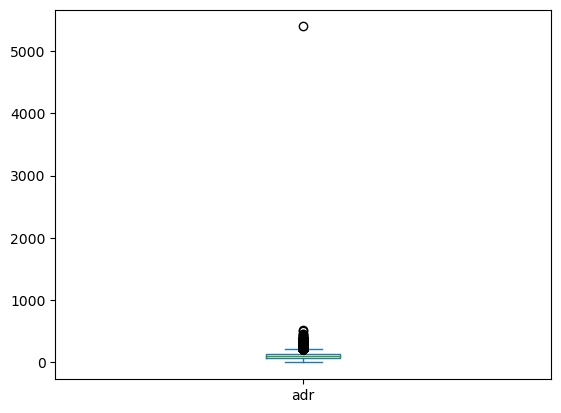

In [15]:
data["adr"].plot(kind='box')

In [16]:
data=data[data["adr"]<5000]

In [17]:
data['adr'].max()

510.0

<AxesSubplot:>

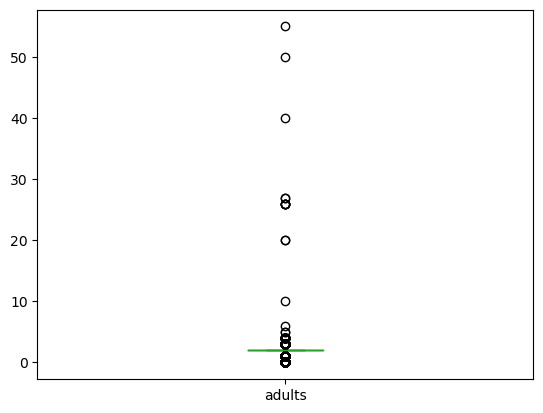

In [18]:
data["adults"].plot(kind='box')


<AxesSubplot:>

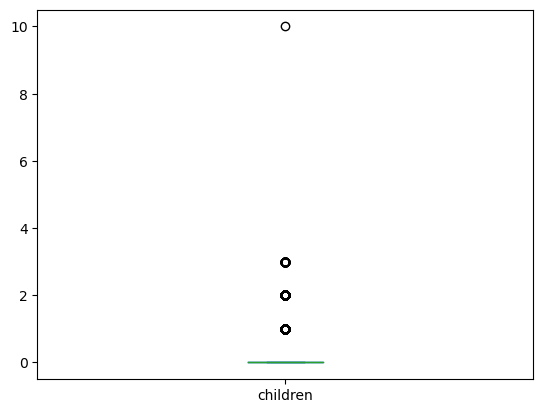

In [19]:
data["children"].plot(kind='box')

<AxesSubplot:>

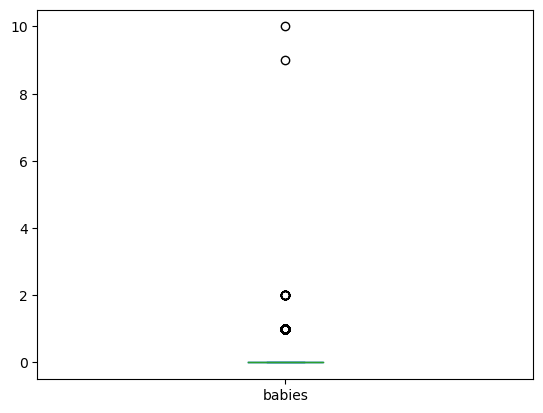

In [20]:
data["babies"].plot(kind='box')

In [21]:
data=data[data["adults"]<30]
data=data[data["children"]<4]
data=data[data["babies"]<4]

In [22]:
data.shape

(118891, 30)

# Data Analysis and Data Visualization

In [23]:
is_canceled_per=data["is_canceled"].value_counts(normalize=True)
is_canceled_per

0    0.628668
1    0.371332
Name: is_canceled, dtype: float64

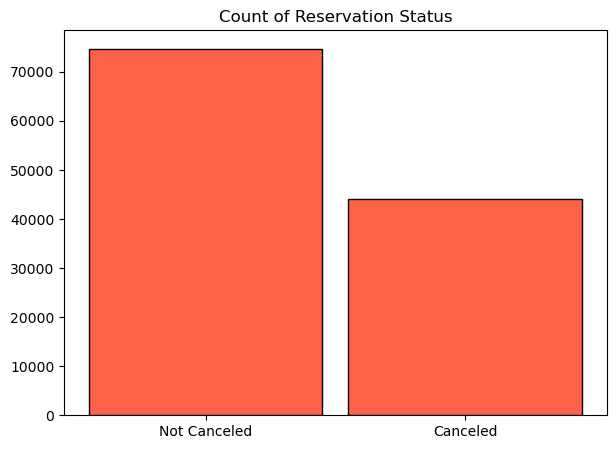

In [24]:
plt.figure(figsize=(7,5))
plt.title("Count of Reservation Status")
plt.bar(['Not Canceled','Canceled'],data['is_canceled'].value_counts(),color='tomato',edgecolor='black',width=.9)
plt.show()

Text(0, 0.5, 'No of reservations')

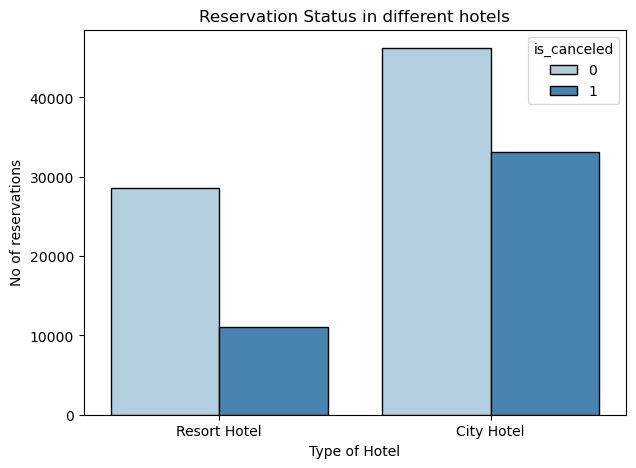

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(x='hotel',hue='is_canceled',palette='Blues',data=data,edgecolor="black")
plt.title("Reservation Status in different hotels")
plt.xlabel("Type of Hotel")
plt.ylabel("No of reservations")

In [26]:
resort_hotel = data[data["hotel"]=='Resort Hotel']
resort_hotel["is_canceled"].value_counts(normalize=True)*100

0    72.032229
1    27.967771
Name: is_canceled, dtype: float64

In [27]:
city_hotel = data[data["hotel"]=="City Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)*100

0    58.290773
1    41.709227
Name: is_canceled, dtype: float64

In [28]:
resort_hotel=resort_hotel.groupby("reservation_status_date")[['adr']].mean()
resort_hotel.sample(5)

,adr
reservation_status_date,
2016-07-23,163.710000
2015-05-11,45.883750
2017-07-31,197.695294
2015-06-15,125.568333
2017-05-25,86.125439


In [29]:
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel.sample(5)

,adr
reservation_status_date,
2016-03-31,102.394528
2017-04-04,131.675914
2015-10-13,87.980593
2015-10-29,97.993913
2017-07-31,143.965738


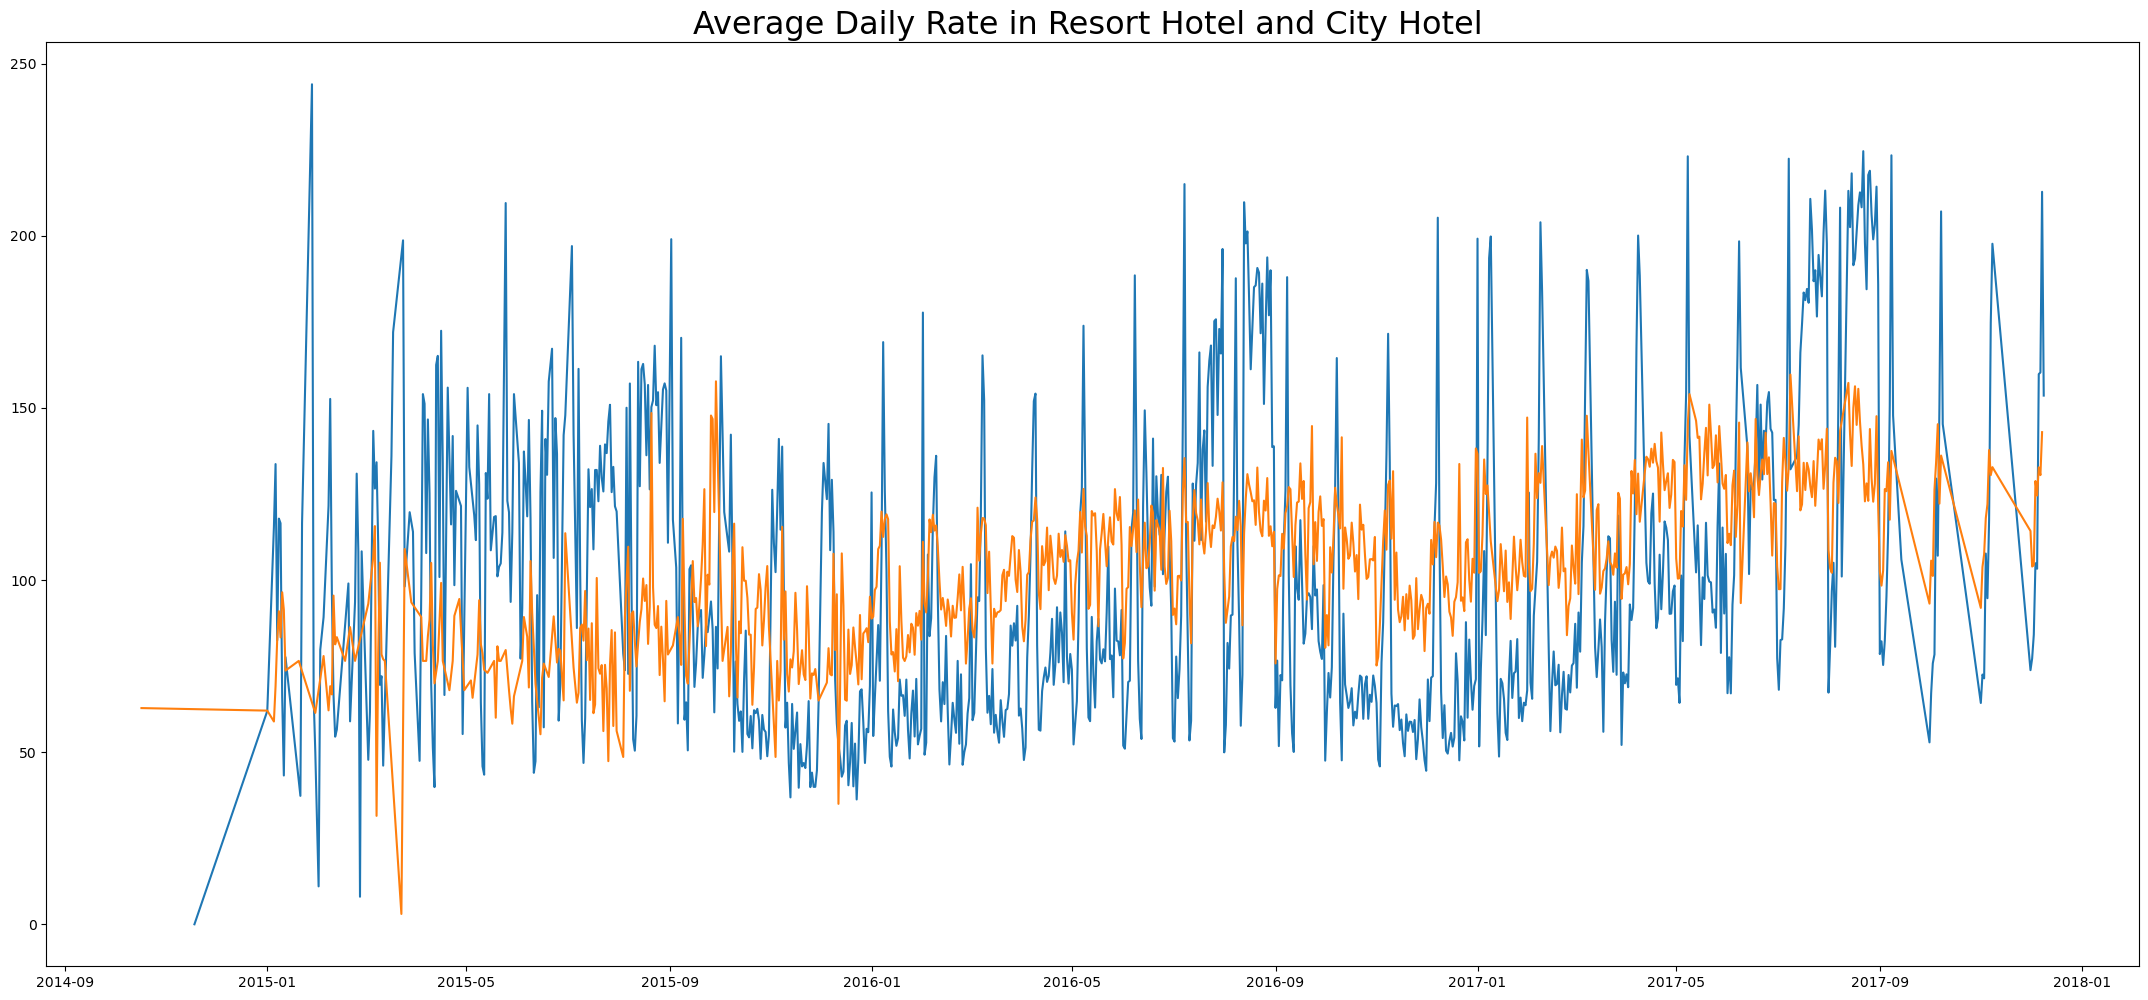

In [59]:
plt.figure(figsize=(27,12))
plt.title("Average Daily Rate in Resort Hotel and City Hotel ", fontsize= 23)
plt.plot(resort_hotel.index,resort_hotel['adr'],label= 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.show()

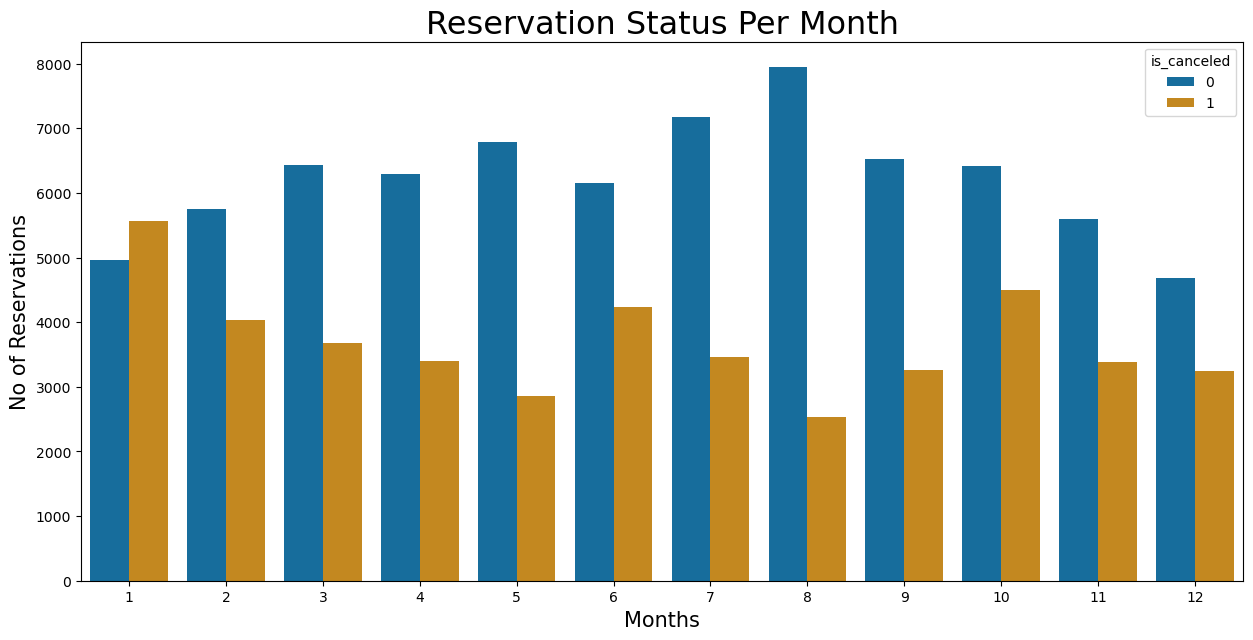

In [60]:
data['month_adr']=data["reservation_status_date"].dt.month
plt.figure(figsize=(15,7))
sns.countplot(x ='month',hue = 'is_canceled',data=data,palette='colorblind')
sns.color_palette("Paired")
plt.title('Reservation Status Per Month',fontsize=23)
plt.xlabel('Months',fontsize=15)
plt.ylabel('No of Reservations',fontsize=15)
plt.show()

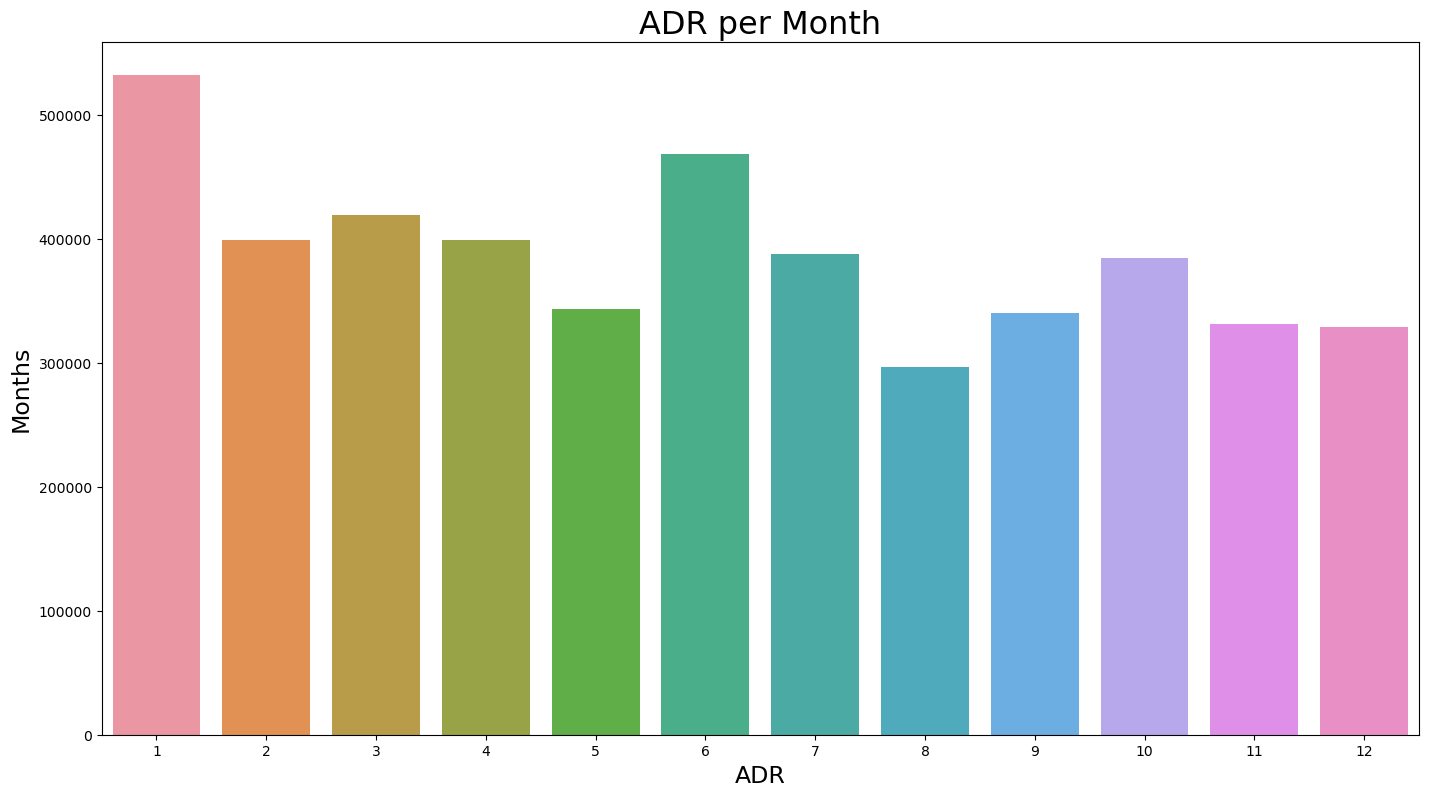

In [67]:
plt.figure(figsize=(17,9))
plt.title('ADR per Month',fontsize=23)
sns.barplot('month_adr','adr',data=data[data["is_canceled"] == 1].groupby('month_adr')[['adr']].sum().reset_index())
plt.xlabel('ADR',fontsize=17)
plt.ylabel('Months',fontsize=17)
plt.show()

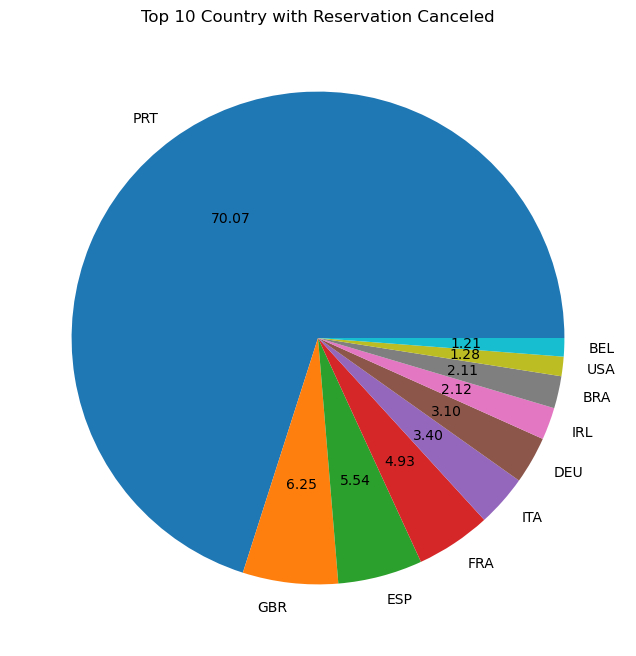

In [86]:
canceled_data=data[data['is_canceled'] == 1]
top_10_country=canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(12,8))
plt.title('Top 10 Country with Reservation Canceled')
plt.pie(top_10_country,autopct= '%.2f',labels = top_10_country.index)
plt.show()